**Muticlass Classification**

In [1]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
import io
data = pd.read_csv(io.BytesIO(uploaded['iris.csv']))

In [4]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


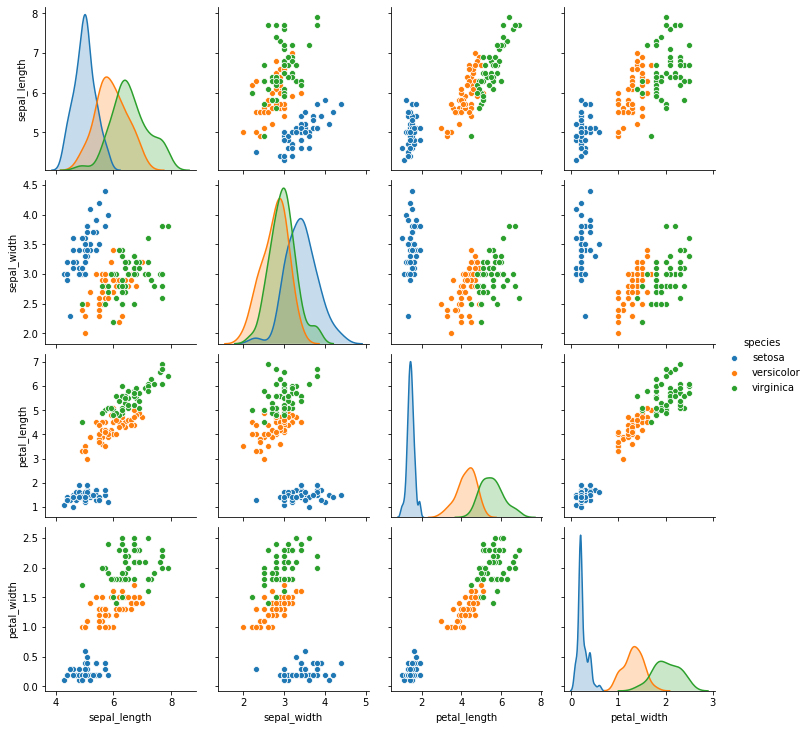

In [5]:
import seaborn as sns
sns.pairplot (data, hue='species')

In [6]:
x = data.drop('species', axis = 1)
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
target_names = data['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [8]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [9]:
y = data['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [10]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
y_cat = to_categorical(y)

In [12]:
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y_cat, test_size=0.2)

In [0]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(lr=0.1),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [18]:
model.fit(x_train, y_train, epochs=20, validation_split=0.1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 108 samples, validate on 12 samples
Epoch 1/20





108/108 [==============================] - 0s 5ms/step - loss: 1.6756 - acc: 0.2685 - val_loss: 0.8851 - val_acc: 0.8333
Epoch 2/20
108/108 [==============================] - 0s 112us/step - loss: 1.0597 - acc: 0.6296 - val_loss: 1.0755 - val_acc: 0.5833
Epoch 3/20
108/108 [==============================] - 0s 77us/step - loss: 0.8625 - acc: 0.6574 - val_loss: 0.5436 - val_acc: 0.8333
Epoch 4/20
108/108 [==============================] - 0s 96us/step - loss: 0.6157 - acc: 0.6019 - val_loss: 0.4556 - val_acc: 0.9167
Epoch 5/20
108/108 [==============================] - 0s 79us/step - loss: 0.4892 - acc: 0.7037 - val_loss: 0.5269 - val_acc: 0.5833
Epoch 6/20
108/108 [==============================] - 0s 69us/step - loss: 0.4845 - acc: 0.7407 - val_loss: 0.3666 - val_acc: 0.9167
Epoch 7/20
108/108 [==============================] - 0

In [0]:
y_pred = model.predict(x_test)

In [20]:
y_pred[:5]

array([[1.4125470e-02, 7.9476845e-01, 1.9110613e-01],
       [1.4110708e-02, 5.3482771e-01, 4.5106164e-01],
       [9.5951504e-01, 4.0422581e-02, 6.2436586e-05],
       [9.7437787e-01, 2.5572425e-02, 4.9745377e-05],
       [8.1834108e-01, 1.8080764e-01, 8.5123914e-04]], dtype=float32)

In [0]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [0]:
from sklearn.metrics import classification_report

In [23]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [0]:
from sklearn.metrics import confusion_matrix

In [25]:
confusion_matrix(y_test_class, y_pred_class)

array([[ 8,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 13]])

**Great Job Shivan!**